# Analise Exploratoria de Dados



#1

In [1]:
import pandas as pd

In [ ]:
# dados é um data frame
dados = pd.read_csv("/content/A210019179_110_66_146.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",")

In [ ]:
#head() puxa as 5 primeiras
dados.head()

In [ ]:
#tail() puxa as 5 ultimas
dados.tail()

In [ ]:
#mean() calcula a media dos valores ou dataset
dados.mean()

In [ ]:
dados.info()

In [7]:
pd.options.display.float_format = "{:.2f}".format

In [ ]:
dados.mean()

In [ ]:
#puxando a columa mais recente
dados[dados.columns[71]]

In [ ]:
dados["2023/Jun"]

In [ ]:
#dtypes mostra todos os tipos de dados no dataframe
dados.dtypes

In [ ]:
dados["2023/Mai"].mean()

In [ ]:
#plot() é usado para criação de graficos

dados.plot(x="Unidade da Federação", y="2018/Abr")

In [ ]:
#axis = eixos do grafico
#yaxis = definindo qual eixo formatar, no caso eixo Y
#set_major_formatter = mudar o formatador
#StrMethodFormatter = Formatador de string

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

axis = dados.plot(x="Unidade da Federação", y="2017/Dez", kind="bar", figsize=(8,5))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valor por unidade da federação")
plt.show()

Desafio 1: Deixar as legendas do eixo X anguladas (0°, 45°)

In [ ]:
#rot altera a rotacao as palavras do eixo, porem ela roda a palavra a partir do meio, caso fosse a partir do final da palavra, ficaria melhor

axis = dados.plot(x="Unidade da Federação", y="2023/Mai", kind="bar", figsize=(8,5), rot=75)
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valor por unidade da federação")
plt.show()

2.1

In [ ]:
#[[]] para puxar mais de uma coluna
dados[["2020/Ago", "2021/Ago"]].head()

In [ ]:
dados.columns

In [ ]:
#tolist() cria uma lista em python
#insert() metodo em python para inserir dados na lista
#[:x] para escolher quantos items da lista em python puxar

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis[:5]

In [ ]:
dados_usaveis = dados[colunas_usaveis]
dados_usaveis.head()

In [ ]:
#set_index = passa a coluna que vai servir como index

dados_usaveis = dados_usaveis.set_index("Unidade da Federação")
dados_usaveis.head()

In [ ]:
dados_usaveis["2023/Mai"].head()

In [ ]:
#.loc = localiza pelo index

dados_usaveis.loc["15 Pará"]

In [ ]:
#.iloc = localiza pela linha

dados_usaveis.iloc[4]

In [ ]:
dados_usaveis.plot(figsize=(8,5))

In [ ]:
dados_usaveis.T.head()

In [26]:
#.drop() apaga uma coluna

dados_usaveis = dados_usaveis.drop('Total', axis=1)

In [ ]:
dados_usaveis.T.plot(figsize=(8,6))

Desafio: reposicionar a legenda;

Desafio: retocar nossa visualização

Desafio: colocar titulos nos dois eixos

In [ ]:
#xlabel % ylabel = colocar titulos nos eixos
#.legend(), ncol, loc, bbox_to_anchor = formatar a posicao da legenda do grafico
#LEMBRAR DE SEMPRE UTILIZAR AXIS QUANDO FOR MEXER NOS EIXOS

axis = dados_usaveis.T.plot(figsize=(10,6))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Total de gastos em internações por estado ao longo de 7 anos")
plt.legend(ncol=2, loc="right", bbox_to_anchor=(1.58,0.68))
plt.xlabel('Período')
plt.ylabel('Milhões de R$')
plt.show()

In [29]:
dados_usaveis.T.columns[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [ ]:
#como plotar um numero especifico de linhas
dados_usaveis[:7].T.plot(figsize=(10,6))

In [ ]:
#sample(n=x) plota uma amostra aleatoria

dados_usaveis.sample(n=7).T.plot(figsize=(10,6))

In [ ]:
import numpy as np

np.random.seed(42)
dados_usaveis.sample(n=7)

In [ ]:
dados_usaveis["Total"] = dados_usaveis.sum(axis=1)
dados_usaveis.head()

Desafio: ordenar Dataframe para que na primeira linha tenha o maior gasto, e na última o menor gasto<br><br>
Desafio: adicionar uma coluna com a região de cada estado <br><br>
Desafio: adiciona seu estado nessa lista de 7 estados (dados_dos_7_estados)

In [34]:
#Desafio 2
#dados_usaveis['Região'] = {'11 Rondônia':'Norte','12 Acre':'Norte','13 Amazonas':'Norte','14 Roraima':'Norte','15 Pará':'Norte','16 Amapá':'Norte',
 #         '17 Tocantins':'Norte','21 Maranhão':'Nordeste','22 Piauí':'Nordeste','23 Ceará':'Nordeste', '24 Rio Grande do Norte':'Nordeste','25 Paraíba':'Nordeste',
 #       '26 Pernambuco':'Nordeste','27 Alagoas':'Nordeste','28 Sergipe':'Nordeste','29 Bahia':'Nordeste','50 Mato Grosso do Sul':'Centro Oeste','51 Mato Grosso':'Centro Oeste',
  #        '52 Goiás':'Centro Oeste','53 Distrito Federal':'Centro Oeste','31 Minas Gerais':'Sudeste','32 Espírito Santo':'Sudeste','33 Rio de Janeiro':'Sudeste',
  #        '35 São Paulo':'Sudeste','41 Paraná':'Sul','42 Santa Catarina':'Sul','43 Rio Grande do Sul':'Sul'}
#dados_usaveis.head()

In [ ]:
#Desafio 1
#.sort_values() para ordenar o dataframe como desejar

dados_ordenados = dados_usaveis.sort_values(by="Total", ascending=False)
dados_ordenados = dados_ordenados.drop("Total", axis=1)
#dados_ordenados = dados_ordenados.drop("Região", axis=1)
dados_ordenados.head()

Desafio: Adicionar mais um estado aos 5 existentes e plotar<br>Desafio: Refinar o grafico<br> Desafio: Pesquisar o sort_index()<br>Desafio: plotar somente os estados de uma região do Brasil

In [ ]:
#Desafio 4
sudeste = dados_ordenados.T[["35 São Paulo", "31 Minas Gerais", "33 Rio de Janeiro"]]
sudeste.plot(figsize=(10,6))


In [ ]:
#Desafio 1 & 2
df = dados_ordenados.loc["23 Ceará"]
dados_ordenados.head().append(df).T.plot(figsize=(10,6))

plt.legend(bbox_to_anchor=(1.28,1))
plt.title("Total de gastos")
plt.xlabel("Periodo")
plt.ylabel("Milhões de R$")
plt.show()

#4

In [38]:
dados_ordenados = dados_ordenados / 1000000

In [ ]:
meses_filtrados = dados_ordenados.columns[5:]
dados_ordenados[meses_filtrados].head(4).T.plot(figsize=(10,6))
plt.title("Total de gastos")
plt.xlabel("Periodo")
plt.ylabel("Milhões de R$")

In [40]:
def plota_gastos(dados, figsize=(10,6)):

  axis = dados.T.plot(figsize=figsize)

  plt.grid(alpha = 0.30)
  #plt.xticks(np.arange(0, 72, step=12) , labels=[str(i**2) for i in range(72)])
  plt.title("Total de gastos")
  plt.xlabel("Periodo")
  plt.ylabel("Milhões de R$")

In [ ]:
plota_gastos(dados_ordenados[meses_filtrados].head(3).append(df))
plt.ylim(0,640)

In [ ]:
plota_gastos(dados_ordenados[dados_ordenados.columns[5:35]].head(3))
plt.ylim(0,350)

In [ ]:
plota_gastos(dados_ordenados[dados_ordenados.columns[-12:]].head(3))
plt.ylim(0,450)

In [ ]:
plota_gastos(dados_ordenados.head(5))
plt.ylim(0,650)

In [ ]:
plota_gastos(dados_ordenados.head(5), figsize=(6,6))
plt.ylim(0,650)

Desafio: Padronizar os ticks verticais para espaçamento de 12 em 12 meses<br>Desafio: Escolher e utilizar outras cores<br>Desafio: Colocar um grid horizontal e vertical que não seja intrusivo

In [46]:
#padronizar os ticks verticais
meses = [i for i in dados_ordenados.T.index if 'Mai' in i]

In [ ]:
plota_gastos(dados_ordenados.head(5), figsize=(20,6))
plt.ylim(0,650)

#5

In [ ]:
mes_mais_recente = dados_ordenados.columns[-1]
mes_mais_recente

In [ ]:
gastos_do_mais_recente = dados_ordenados[mes_mais_recente]
gastos_do_mais_recente.head()

In [ ]:
gastos_do_mais_recente.plot(kind="pie")

- Difícil de identificar os elementos
- Número de elementos muito grande
- Cores repetidindo pois são muitos elementos

In [ ]:
gastos_do_mais_recente.sample(frac=1).plot(kind='pie')

In [ ]:
gastos_do_mais_recente

In [ ]:
#Comparação de gastos entre estados, nesse caso comparando todos em relação ao Paraná
tabela_de_comparacao = gastos_do_mais_recente / gastos_do_mais_recente.loc["41 Paraná"]
tabela_de_comparacao.head()

In [ ]:
tabela_de_comparacao.plot(kind='barh')

In [ ]:
tabela_de_comparacao.plot(kind='bar')

In [ ]:
tabela_de_comparacao = tabela_de_comparacao.sort_values(ascending=False)
tabela_de_comparacao.plot(kind='bar')

Desafio 1: Passar uma linha horizontal no seu estado<br>Desafio 2: Atualizar o ultimo grafico para refletir seu estado (usar RJ como exemplo), incluindo grid, eixos etc.<br>Desafio 3: Colorir o seu estado com um tom diferente<br>Desafio 4: Gasto por população de dois estados, plotar a comparação desses gastos de acordo com a populacao deles<br>Desafio 5: Escolha outro valor além de 'Valor Aprovado' no tabnet

In [ ]:
#Desafio 1, 2 & 3

tabela_do_desafio = gastos_do_mais_recente / gastos_do_mais_recente.loc["33 Rio de Janeiro"]
tabela_do_desafio = tabela_do_desafio.sort_values(ascending=False)

axis = tabela_do_desafio.plot(kind='bar', color = 'firebrick')

plt.bar(x=3, color='darkorange',height=1, width = 0.45)
plt.bar(x=[0,1,2], color='yellowgreen',height=[3.09,1.79,1.29], width = 0.5)

plt.grid(alpha=0.4)
plt.axhline(y=1, color='r', linestyle='--')

plt.xlabel('Estados')
plt.ylabel('Gasto em relação ao Rio de Janeiro')

#Visualização de Dados - 1

In [ ]:
#read_excel
ibge_estimativa2020 = pd.read_excel("/content/estimativa_dou_2020.xlsx", skiprows=1,skipfooter=7)
ibge_estimativa2020 = ibge_estimativa2020.drop(columns="Unnamed: 1").set_index("BRASIL E UNIDADES DA FEDERAÇÃO")
ibge_estimativa2020 = ibge_estimativa2020.drop(['Região Norte','Região Nordeste','Região Sudeste','Região Sul'])
ibge_estimativa2020

In [59]:
dados_da_populacao2022 = """Posição	Unidade federativa	População	% da pop total	País comparável
1	 São Paulo	44 420 459	21,88%	 Espanha (46 754 778)
2	 Minas Gerais	20 538 718	10,11%	 Burquina Fasso (20 903 273)
3	 Rio de Janeiro	16 054 524	7,91%	Camboja Camboja (16 718 965)
4	Bahia Bahia	14 136 417	6,96%	 Zimbabwe (14 862 924)
5	 Paraná	11 443 208	5,64%	 Tunísia (11 818 619)
6	 Rio Grande do Sul	10 880 506	5,36%	 Cuba (11 326 616)
7	 Pernambuco	9 058 155	4,46%	 Áustria (9 006 398)
8	 Ceará	8 791 688	4,33%	 Papua-Nova Guiné (8 947 024)
9	Pará Pará	8 116 132	4,1%	 Suíça (8 654 622)
10	 Santa Catarina	7 609 601	3,75%	 Paraguai (7 132 538)
11	 Goiás	7 055 228	3,47%	 Bulgária (6 948 445)
12	 Maranhão	6 775 152	3,34%	 Bulgária (6 948 445)
13	 Paraíba	3 974 495	1,96%	 Geórgia (3 989 167)
14	 Amazonas	3 941 175	1,94%	 Geórgia (3 989 167)
15	 Espírito Santo	3 833 486	1,89%	 Geórgia (3 989 167)
16	 Mato Grosso	3 658 813	1,8%	 Geórgia (3 989 167)
17	 Rio Grande do Norte	3 302 406	1,63%	 Uruguai (3 473 730)
18	 Piauí	3 269 200	1,61%	 Bósnia e Herzegovina (3 280 819)
19	 Alagoas	3 127 511	1,54%	 Mónaco (3 278 290)
20	 Distrito Federal	2 817 068	1,39%	 Armênia (2 963 243)
21	 Mato Grosso do Sul	2 756 700	1,36%	 Albânia (2 877 797)
22	 Sergipe	2 209 558	1,09%	 Gabão (2 225 734)
23	 Rondônia	1 581 016	0,78%	 Bahrein (1 701 575)
24	 Tocantins	1 511 459	0,74%	 Guiné Equatorial (1 402 985)
25	 Acre	830 026	0,41%	 Comores (869 601)
26	 Amapá	733 508	0,36%	 Guiné (786 552)
27	 Roraima	636 303	0,31%	 Montenegro (649 335)
"""

In [60]:
#StringIO faz uma String se tranformar em um fluxo de entrada para ler dados
from io import StringIO

dados_da_populacao2022_io = StringIO(dados_da_populacao2022)

populacao = pd.read_csv(dados_da_populacao2022_io, sep="\t")
populacao = populacao.dropna()

Desafio: Limpar o excel do IBGE com nomes de colunas apropriados e linhas somente com os estados<br>

In [ ]:
#Renomeando todas as colunas
populacao.columns = ["posicao","uf","populacao","porcentagem","pais_comparavel"]

#astype() muda o datatype
populacao["populacao"] = populacao["populacao"].str.replace(" ","").astype(int)

#selecionando colunas especificas e apagando o restante
populacao = populacao[['uf', 'populacao']]
populacao.head()

In [ ]:
populacao.describe()

In [ ]:
#CONECTANDO AS TABELAS
display(gastos_do_mais_recente.head())
display(populacao.head())

In [ ]:
populacao = populacao.set_index('uf')
populacao.head()

In [65]:
#removendo os espaços em branco com strip()
populacao.index = populacao.index.str.strip()

In [ ]:
for estado in gastos_do_mais_recente.index:
  populacao.index = populacao.index.str.replace(f"{estado} {estado}", estado)
populacao.index

In [67]:
#Removendo os numeros dos indices da tabela gastos_do_mais_recente
gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]

In [ ]:
#join() serve para conectar as tabelas, sempre buscando conectar pelo index
gastos_e_populacao = populacao.join(gastos_do_mais_recente)
gastos_e_populacao.head()

#Visualização de Dados - 2

In [ ]:
#adicionando uma coluna nova
ultima_coluna = gastos_e_populacao.columns[-1]
gastos_e_populacao["gastos"] = gastos_e_populacao[ultima_coluna] * 1_000_000
gastos_e_populacao.plot()

In [ ]:
gastos_e_populacao.loc[["Ceará","Pará"]]

In [ ]:
64865810.21 / 8791688

In [73]:
44008702.18 / 8116132

5.422373882041347

In [ ]:
gastos_e_populacao["gasto_por_habitante"] = gastos_e_populacao["gastos"] / gastos_e_populacao["populacao"]
gastos_e_populacao

In [ ]:
gastos_e_populacao_ordenados = gastos_e_populacao.sort_values(by="gasto_por_habitante", ascending=False)
gastos_e_populacao_ordenados["gasto_por_habitante"].plot(kind="bar")

plt.legend()
plt.title("Representação do gasto por habitante de cada estado")
plt.xlabel("Estados")
plt.ylabel("R$")

Desafio: Arrumar o grafico com legenda, eixos, titulo e ordenar do maior para o menor<br>Desafio: Colocar a média de gastos como uma linha horizontal<br>Desafio: Ordenar por número de habitantes

In [ ]:
import seaborn as sns
sns.scatterplot(data = gastos_e_populacao / 1_000_000, x = "populacao", y = "gastos")

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data = gastos_e_populacao / 1_000_000, x = "populacao", y = "gastos")

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data = gastos_e_populacao, x = "populacao", y = "gasto_por_habitante")

Desafio: Melhorar o gráfico<br>Desafio: Executar o mesmo grafico para o penultimo mês e plotar ambos simultaneamente

In [161]:
#Removendo os numeros dos indices da tabela dados_ordenados
dados_ordenados.index = dados_ordenados.index.str[3:]

In [194]:
def insere_gastos_e_gasto_por_habitante(dados_ordenados,gastos_e_populacao,mes):
  gastos = dados_ordenados[mes]
  gastos_e_populacao[f"gastos_{mes}"] = gastos * 1_000_000
  gastos_e_populacao[f"gasto_por_habitante_{mes}"] = gastos_e_populacao[f"gastos_{mes}"] / gastos_e_populacao["populacao"]
  return gastos_e_populacao

In [200]:
gastos_e_populacao = insere_gastos_e_gasto_por_habitante(dados_ordenados, gastos_e_populacao, dados_ordenados.columns[-1])
gastos_e_populacao = insere_gastos_e_gasto_por_habitante(dados_ordenados, gastos_e_populacao, dados_ordenados.columns[-2])
gastos_e_populacao = insere_gastos_e_gasto_por_habitante(dados_ordenados, gastos_e_populacao, dados_ordenados.columns[-3])
gastos_e_populacao = insere_gastos_e_gasto_por_habitante(dados_ordenados, gastos_e_populacao, dados_ordenados.columns[-4])

In [ ]:
gastos_e_populacao.head()

<Axes: xlabel='Populacao', ylabel='Gastos'>

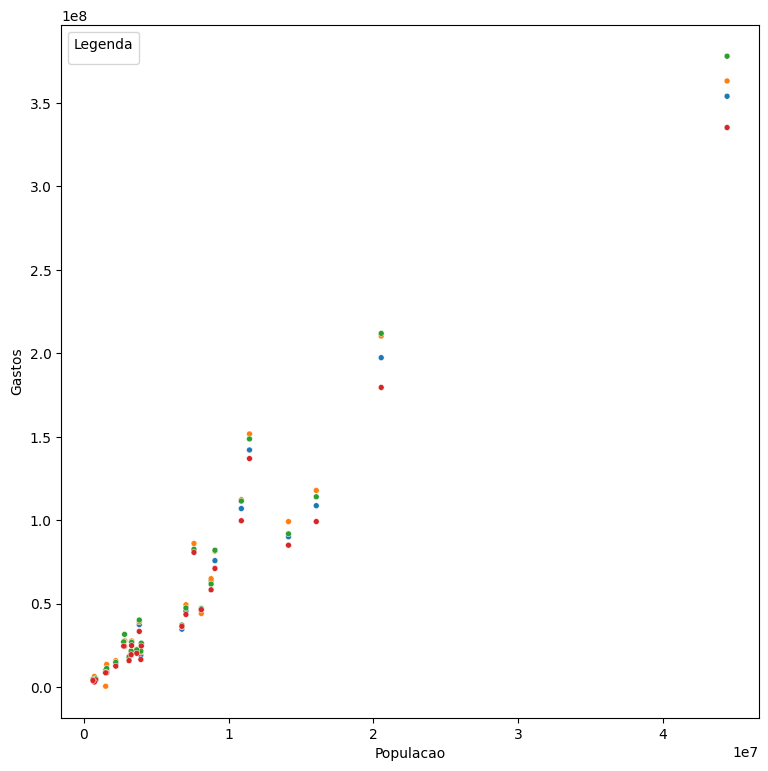

In [255]:
plt.figure(figsize=(9,9))
plt.legend(title='Legenda', loc='upper left')

plt.ylabel('Gastos')
plt.xlabel('Populacao')

sns.scatterplot(data = gastos_e_populacao, x = "populacao", y='gastos_2023/Abr',label ='2023/Maio',size=1,legend=False)
sns.scatterplot(data = gastos_e_populacao, x = "populacao", y='gastos_2023/Mai',label ='2023/Abril',size=1,legend=False)
sns.scatterplot(data = gastos_e_populacao, x = "populacao", y='gastos_2023/Mar',label ='2023/Março',size=1,legend=False)
sns.scatterplot(data = gastos_e_populacao, x = "populacao", y='gastos_2023/Fev',label ='2023/Fevereiro',size=1,legend=False)

Desafio: legenda, diminuir marcações